In [1]:
from pathlib import Path
import json
import gzip
import monty.json

In [2]:
with gzip.open(Path("generated", "WyckoffTransformer_mp_20_DiffCSP++_tol=0.1.json.gz"), 'rt') as f:
    data = json.load(f)
data = monty.json.MontyDecoder().process_decoded(data)

In [3]:
from DiffCSP_to_sites import StructureToSites
from multiprocessing import Pool
converter = StructureToSites(tol=1e-4)
with Pool() as pool:
    sites_after = pool.map(converter.structure_to_sites, data)

In [4]:
with gzip.open(Path("generated", "WyckoffTransformer_mp_20.json.gz"), 'rt') as f:
    sites_before = json.load(f)

In [5]:
import pickle
with open(Path("cache", "wychoffs_enumerated_by_ss.pkl.gz"), "rb") as f:
    letter_to_enum, _ , letter_to_ss = pickle.load(f)[:3]
from wyckoff_transformer.evaluation import generated_to_fingerprint
from functools import partial
invoke_generated_to_fingerprint = partial(generated_to_fingerprint, letter_to_enum=letter_to_enum, letter_to_ss=letter_to_ss)
mismatches = 0
nones = 0
for before, after in zip(sites_before, sites_after):
    if after is None:
        nones += 1
        continue
    before_fingerprint = invoke_generated_to_fingerprint(before)
    after_fingerprint = invoke_generated_to_fingerprint(after)
    if before_fingerprint != after_fingerprint:
        mismatches += 1
        print(before_fingerprint, after_fingerprint)
        print(before, after)
        print()

(71, frozenset({(Element In, 'mm2', 1), (Element In, 'm2m', 0), (Element Cu, '-1', 0), (Element In, 'm2m', 1), (Element Cu, 'mm2', 0), (Element Dy, 'mmm', 1)})) (71, frozenset({(Element In, 'mm2', 1), (Element In, 'mm2', 0), (Element Cu, 'm2m', 0), (Element Cu, '-1', 0), (Element In, 'm2m', 1), (Element Dy, 'mmm', 1)}))
{'group': 71, 'sites': [['4h', '4j', '4g'], ['4i', '8k'], ['2b']], 'species': ['In', 'Cu', 'Dy'], 'numIons': [12, 12, 2]} {'group': 71, 'sites': [['4j', '4h', '4i'], ['4g', '8k'], ['2b']], 'species': ['In', 'Cu', 'Dy'], 'numIons': [12, 12, 2]}

(217, frozenset({(Element Mg, '-43m', 0), (Element Ag, '-42.m', 0)})) (229, frozenset({(Element Mg, 'm-3m', 0), (Element Ag, '4/mm.m', 0)}))
{'group': 217, 'sites': [['6b'], ['2a']], 'species': ['Ag', 'Mg'], 'numIons': [6, 2]} {'group': 229, 'sites': [['6b'], ['2a']], 'species': ['Ag', 'Mg'], 'numIons': [6, 2]}

(115, frozenset({(Element Te, '2mm.', 2), (Element Sb, '-4m2', 1), (Element La, '2mm.', 2), (Element Sb, '-4m2', 0)})) 

In [6]:
print (f"mismatches: {mismatches}, nones: {nones}, total: {len(sites_after)}")

mismatches: 43, nones: 0, total: 1000


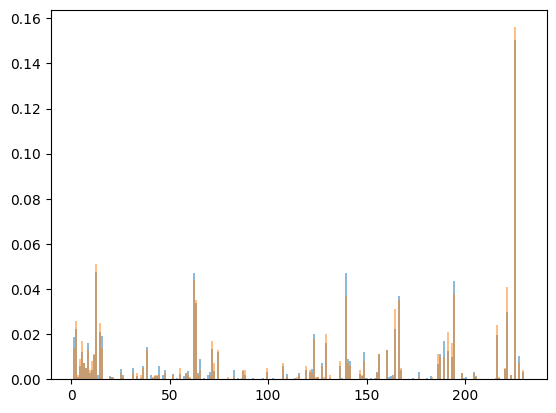

In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.hist([wr['group'] for wr in sites_before], bins=range(1, 231), density=True, alpha=0.5)
ax.hist([wr['group'] for wr in sites_after if wr is not None], bins=range(1, 231), alpha=0.5, density=True);